In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import os
os.chdir("/content/drive/My Drive/UPSEDS4Econ2425s2")

In [3]:
path = os.getcwd()
data_path = path + '/03_data'
apis_path = data_path + '/PHL-PSA-APIS-2022-PUF/'

hh_rec = pd.read_csv(apis_path + "APIS PUF 2022 Household Record.CSV")
mem_rec = pd.read_csv(apis_path + "APIS PUF 2022 Member Record.CSV")
apis_rtg1 = pd.read_csv(apis_path + "APIS PUF 2022 RTG1 - Social Protection - Social Insurance.CSV")
apis_rtg2 = pd.read_csv(apis_path + "APIS PUF 2022 RTG2 - Social Protection - Social Assistance.CSV")
apis_rtg3 = pd.read_csv(apis_path + "APIS PUF 2022 RTG3 - Social Protection - Labor Market Intervention.CSV")
apis_rtg4 = pd.read_csv(apis_path + "APIS PUF 2022 RTG4 - Government Feeding Program.CSV")
apis_rtg5 = pd.read_csv(apis_path + "APIS PUF 2022 RTG5 - Social Protection - Philhealth, Children, Disaster Preparedness and Recovery.CSV")
apis_rth = pd.read_csv(apis_path + "APIS PUF 2022 RTH - Access to Government Services.CSV")
apis_rti = pd.read_csv(apis_path + "APIS PUF 2022 RTI - Housing.CSV")
apis_rtj = pd.read_csv(apis_path + "APIS PUF 2022 RTJ - Water Sanitation and Hygiene.CSV")
apis_rtk = pd.read_csv(apis_path + "APIS PUF 2022 RTK - Other Relevant Information.CSV", on_bad_lines='skip')

In [4]:
apis = {
    "Household Record": hh_rec,
    "Member Record": mem_rec,
    "RTG1 - Social Insurance": apis_rtg1,
    "RTG2 - Social Assistance": apis_rtg2,
    "RTG3 - Labor Market Intervention": apis_rtg3,
    "RTG4 - Government Feeding Program": apis_rtg4,
    "RTG5 - Philhealth, Children, Disaster Prep and Recovery": apis_rtg5,
    "RTH - Access to Government Services": apis_rth,
    "RTI - Housing": apis_rti,
    "RTJ - Water Sanitation and Hygiene": apis_rtj,
    "RTK - Other Relevant Information": apis_rtk
}

# reduce each dataframe to the first instance of each unique "HHID"
for name, data in apis.items():
    data.drop_duplicates(subset='HHID', keep='first', inplace=True)
    print(f"Dataset: {name}" )
    print("shape:", data.shape)
    print("--------------------")

Dataset: Household Record
shape: (43517, 17)
--------------------
Dataset: Member Record
shape: (43517, 75)
--------------------
Dataset: RTG1 - Social Insurance
shape: (43517, 7)
--------------------
Dataset: RTG2 - Social Assistance
shape: (43517, 5)
--------------------
Dataset: RTG3 - Labor Market Intervention
shape: (43517, 5)
--------------------
Dataset: RTG4 - Government Feeding Program
shape: (43517, 5)
--------------------
Dataset: RTG5 - Philhealth, Children, Disaster Prep and Recovery
shape: (43517, 38)
--------------------
Dataset: RTH - Access to Government Services
shape: (43517, 7)
--------------------
Dataset: RTI - Housing
shape: (43517, 58)
--------------------
Dataset: RTJ - Water Sanitation and Hygiene
shape: (43517, 40)
--------------------
Dataset: RTK - Other Relevant Information
shape: (43515, 28)
--------------------


In [ ]:
apis_4merge = {
    "Member Record": mem_rec,
    "RTG1 - Social Insurance": apis_rtg1,
    "RTG2 - Social Assistance": apis_rtg2,
    "RTG3 - Labor Market Intervention": apis_rtg3,
    "RTG4 - Government Feeding Program": apis_rtg4,
    "RTG5 - Philhealth, Children, Disaster Prep and Recovery": apis_rtg5,
    "RTH - Access to Government Services": apis_rth,
    "RTI - Housing": apis_rti,
    "RTJ - Water Sanitation and Hygiene": apis_rtj,
    "RTK - Other Relevant Information": apis_rtk
}

apis_merged = hh_rec.copy()

for name, data in apis_4merge.items():
    data_copy = data.copy()
    data_copy.drop(columns=['REG'], inplace=True)
    apis_merged = apis_merged.merge(data_copy, on='HHID', how='left')

print(apis_merged.shape)

(43517, 265)


In [ ]:
apis_merged_clean = apis_merged.dropna(subset=['K5'])

In [ ]:
apis_merged_clean['FSIZE'].value_counts()

,count
FSIZE,
4,8967
3,7491
5,7225
2,5818
6,4629
1,3861
7,2576
8,1419
9,709


In [ ]:
apis_merged_clean['hh_income_pc'] = apis_merged_clean['K5'] / apis_merged_clean['FSIZE']
apis_merged_clean[['hh_income_pc', 'K5','FSIZE']].describe()

<ipython-input-20-7e882bf355df>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apis_merged_clean['hh_income_pc'] = apis_merged_clean['K5'] / apis_merged_clean['FSIZE']


,hh_income_pc,K5,FSIZE
count,43515.000000,43515.000000,43515.000000
mean,6004.897805,21114.357991,4.196438
std,9039.285687,25372.930633,2.124145
min,166.666667,500.000000,1.000000
25%,2433.333333,9000.000000,3.000000
50%,3750.000000,15000.000000,4.000000
75%,6666.666667,25000.000000,5.000000
max,500000.000000,1000000.000000,20.000000


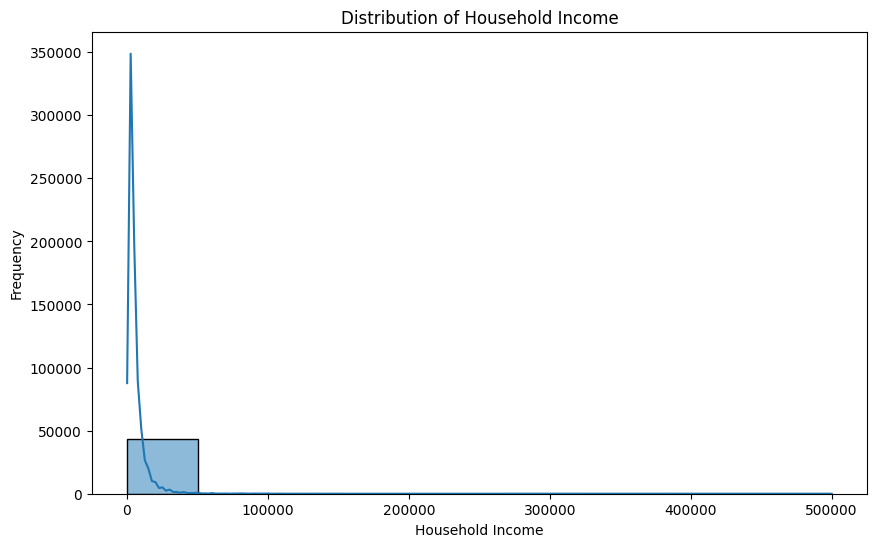

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a distribution of 'hh_income_pc'
plt.figure(figsize=(10, 6))
sns.histplot(apis_merged_clean['hh_income_pc'], bins=10, kde=True)
plt.xlabel("Household Income")
plt.ylabel("Frequency")
plt.title("Distribution of Household Income")
plt.show()